In [1]:
pip install pandas scikit-learn matplotlib openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 1.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
#import all of the required libraries and classes right here


import pandas as pd #for data manipulation
import re #regular expressions
from sklearn.preprocessing import StandardScaler #for feature scaling
import matplotlib.pyplot as plt #data visualization
import numpy as np #numerical operations
import warnings #all below for machine learning tests
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.simplefilter('ignore') #ignore warnings during execution

In [6]:
df=pd.read_excel('/Users/krishnamehta/Desktop/Price Prediction Model /Coffee-Price-prediction-model/Coffee_shop_data.xlsx') #loads data from excel file into pandas dataframe called df in order to analyze and manipulate data
population=pd.read_csv('population.csv',skiprows=[0]) #pd.read_csv is a pandas function to read comma seperated values, population.csv is file name beign read, skiprows tells it to skip first row in data

In [7]:
population.head() #gives first five rows of population data frame

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,8600000US89010,ZCTA5 89010,1,Total population,172,NaN,51,69,19,12,12,4,5
1,8600000US89019,ZCTA5 89019,1,Total population,1164,NaN,412,421,134,83,57,32,25
2,8600000US89060,ZCTA5 89060,1,Total population,4144,NaN,1106,1714,550,361,222,95,96
3,8600000US89061,ZCTA5 89061,1,Total population,2109,NaN,469,936,283,206,112,62,41
4,8600000US89439,ZCTA5 89439,1,Total population,671,NaN,193,314,88,55,17,2,2


In [8]:
df.head()#checking first five rows of coffee shop data stored as df

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.5,Male,72463,3.31000
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,87117,5.35000
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,86394,4.15000
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,88343,5.34000
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,77795,4.51175


In [9]:
# check for data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [10]:
#check the number of records and features...1000 rows and 11 columns in coffee shop data
df.shape

(1000, 11)

In [11]:
population.shape #1705 rows and 13 columns in california population data

(1705, 13)

In [12]:
# get basic stats about the data of coffee shops
df.describe()

,ID no.,Zip Code,Rating,Median Salary,Latte Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,92976.163000,3.784600,81182.842000,5.061491
std,288.819436,1706.943177,1.150717,5142.670356,0.352002
min,1.000000,90005.000000,1.000000,72001.000000,3.090000
25%,250.750000,91751.750000,3.200000,76776.000000,4.830175
50%,500.500000,92883.000000,4.240000,81113.000000,5.062450
75%,750.250000,94257.000000,4.580000,85684.000000,5.310025
max,1000.000000,96154.000000,5.000000,89978.000000,6.480000


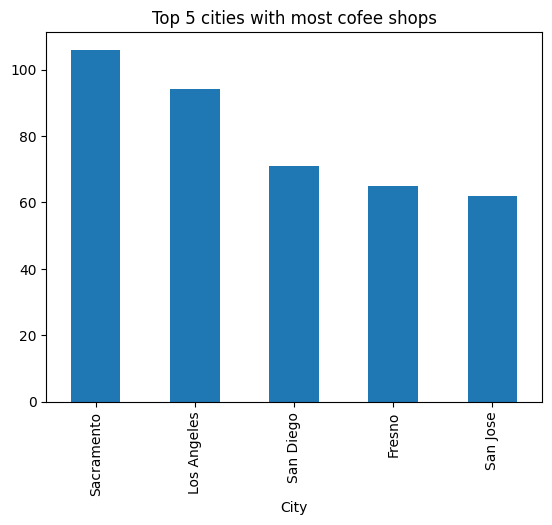

In [13]:
ax=df['City'].value_counts().head(5).plot(kind='bar') #ax is axis object used for plotting, df[city]selects city column from df, .value_counts = counts how many tiems each unique city appears(essentially how many coffee shops per area), .head(5) = selects top 5 cities with most coffee shops, .plot(kind="bar") = create bar chart where x axis is top 5 cities, y is number of shpos per city
ax.set_title('Top 5 cities with most cofee shops') #set graph title
plt.show() #plot graph

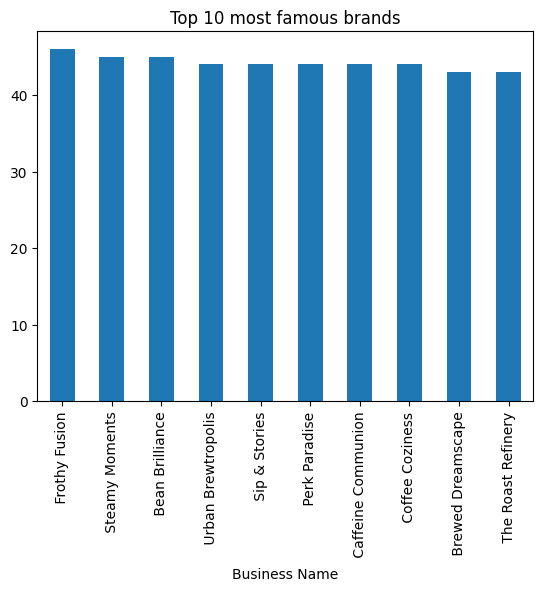

In [14]:
ax=df['Business Name'].value_counts().head(10).plot(kind='bar')
ax.set_title('Top 10 most famous brands')
plt.show()

In [15]:
df.isna().sum()
# no null values
# if we have null values we would impute it. If we have numberical replace mean. Missing values - replace it with the mode (most occuring values)

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64

In [16]:
#converting zipcode column in df data frama to object data (str) - We need to join the zip code with the population data. Converting the coffee shop data. In order to store it into alphanumerical value, it should be string.
df['Zip Code']=df['Zip Code'].astype(str)

In [17]:
#extract zip code from population data
# Find all of the zipcode that has a 5 digit pattern. Getting the last 5 digits from the population zip code. Creating a new column called zip code

def find_zip_code(geocode):
    pattern = r'\d{5}$'

    match = re.search(pattern, geocode)

    if match:
        zip_code = match.group(0)
    return zip_code


In [18]:
# The actual coversion is below. The above is the function

population['Zip Code']=population['Geography'].apply(find_zip_code)

In [19]:
cafe_data=df.copy()
# merging the population via zip code as population is an important feature to determing the price / locations
df=pd.merge(cafe_data,population) #pd.merge is used to merge cafe data with population based on zipcode column
#notice that the data size is reduced afer a join

In [20]:
#keeping only Total from population. In the pop dataset, keeping total population column and other columns.
columns=cafe_data.columns.values.tolist()+['Total']
df=df[columns]
#rename Total to Population
df=df.rename(columns={"Total":"Population"})

In [21]:
df

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
0,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,5.35000,11180
1,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.20,Female,78753,5.31765,15310
2,10,Perk Palace,7 David Junction,Fresno,California,93726,559-323-2365,4.20,Female,80973,5.30665,13942
3,11,The Coffee Cartel,6018 Rockefeller Center,Orange,California,92867,714-292-8390,1.90,Male,74340,4.43900,13284
4,14,Grindhouse Cafe,7846 Cherokee Junction,Visalia,California,93291,559-253-9426,4.50,Male,78753,5.27165,15310
...,...,...,...,...,...,...,...,...,...,...,...,...
407,982,Perk Paradise,4 Park Meadow Crossing,Van Nuys,California,91411,818-584-8823,4.00,Female,76034,4.99170,9177
408,983,Urban Brewtropolis,2459 Golden Leaf Place,Santa Monica,California,90405,818-215-2671,4.82,Female,86920,4.98200,14376
409,985,Caffeine Communion,40 Sommers Parkway,San Jose,California,95133,408-304-3646,4.04,Female,78176,4.64680,7365
410,998,Urban Brewtropolis,141 Burrows Place,Los Angeles,California,90035,323-785-4094,3.00,Male,87604,4.64000,12814


In [22]:
#keeping only relevant features
df= df[['Zip Code','Rating','Median Salary','Latte Price','Population']]
df.shape


(412, 5)

In [23]:
df.columns    

Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')

In [24]:
# Calculate the total number of coffee shops for each zip code
coffee_shop_counts = df['Zip Code'].value_counts().reset_index()
coffee_shop_counts.columns = ['Zip Code', 'CoffeeShopCount']

# Ensure 'Zip Code' is of type string in both DataFrames
df['Zip Code'] = df['Zip Code'].astype(str)
coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].astype(str)

# Merge the counts back into the original DataFrame
df = df.merge(coffee_shop_counts, on='Zip Code', how='left')

# Print the updated DataFrame
print(df)

# Criteria:
# a. High population
# b. Low total number of coffee shops
# c. Low ratings
# d. High median salary

# Sorting the DataFrame based on the criteria
sorted_df = df.sort_values(by=['Population', 'CoffeeShopCount', 'Rating', 'Median Salary'],
                           ascending=[False, True, True, False]).reset_index(drop=True)


    Zip Code  Rating  Median Salary  Latte Price  Population  CoffeeShopCount
0      95210    5.00          87117      5.35000       11180                4
1      93291    1.20          78753      5.31765       15310                7
2      93726    4.20          80973      5.30665       13942                5
3      92867    1.90          74340      4.43900       13284                9
4      93291    4.50          78753      5.27165       15310                7
..       ...     ...            ...          ...         ...              ...
407    91411    4.00          76034      4.99170        9177                8
408    90405    4.82          86920      4.98200       14376                3
409    95133    4.04          78176      4.64680        7365                6
410    90035    3.00          87604      4.64000       12814                5
411    92867    4.50          74340      3.82000       13284                9

[412 rows x 6 columns]


In [25]:
# Created a list to store unique zip codes - if length of list 5, if the zip code is already present, it will not add that into the list. 
# Deduping zip code column and displaying all of the records for the top 5.
lst=[]
for i in range(len(sorted_df)):
    if len(lst)!=5:
        if (sorted_df['Zip Code'][i]) not in lst:
            lst.append(sorted_df['Zip Code'][i])
            
# Filter 'sorted_df' to include only rows where 'Zip Code' is in 'lst'
top_5_zip_codes_df = sorted_df[sorted_df['Zip Code'].isin(lst)]

top_5_zip_codes_df

,Zip Code,Rating,Median Salary,Latte Price,Population,CoffeeShopCount
0,94110,2.22,74020,5.04500,27128,5
1,94110,3.50,74020,5.04700,27128,5
2,94110,4.40,74020,5.05900,27128,5
3,94110,4.50,74020,4.77900,27128,5
4,94110,4.70,74020,4.58100,27128,5
5,90805,3.00,88140,5.47900,26056,4
6,90805,3.89,88140,5.31900,26056,4
7,90805,4.31,88140,5.02100,26056,4
8,90805,4.37,88140,5.20700,26056,4
9,95823,4.30,73165,4.96825,22470,3


In [26]:
X = df.drop(['Latte Price', 'Zip Code'], axis=1)  # Features excluding 'Latte Price' and 'Zip Code'
y = df['Latte Price']  # Target variable


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
#Model Selection - create dictionary named models to create instance sof created models, each model is now associate w key
#choosing 3 diff regression models - regression models used when want to predict continuous outcome variable...continuous outcome variable is a variable that can take an infinite number of values within a certain range
models = {
    'Linear Regresion': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()    
}


In [30]:
#Hyperparameter Tuning - finding recipe for optimal performance
param_grid = { #dictionary specificies grid of hyperparameteres for 2 models
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}, 
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]},
}


In [33]:
for model_name, model in models.items():
    if model_name in param_grid:
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)

        # Set the best hyperparameters to the model
        models[model_name] = grid_search.best_estimator_


In [34]:
#Model Training
for model_name, model in models.items():
  model.fit(X_train,y_train)


In [35]:
# Model Evaluation
for model_name, model in models.items():
    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)
    print(f"{model_name} Metrics:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))   #actua value and predicted value
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    print()

#results show that linear regression is slightly better than other models, so it will be used from now

Linear Regresion Metrics:
Mean Absolute Error: 0.21737899529390028
Mean Squared Error: 0.06581667796516913
R-squared: 0.4434232069416032

Random Forest Metrics:
Mean Absolute Error: 0.232070481115816
Mean Squared Error: 0.07534076407166834
R-squared: 0.36288305411327826

Gradient Boosting Metrics:
Mean Absolute Error: 0.21845911975703092
Mean Squared Error: 0.06691641904757743
R-squared: 0.4341232789633891



In [36]:
#want this dataframe to be same as the training data so that model can predict the value
zip_codes_df= top_5_zip_codes_df.drop(['Zip Code', 'Latte Price'], axis=1)  #remove zipcode and latte price column as zipcode is just identifier, and latte price is what we r predicting
zip_codes_df= sc.transform(zip_codes_df)

In [37]:
for model_name, model in models.items():
    # Predict the prices for lattes in the top 5 zip codes
    predicted_prices = model.predict(zip_codes_df)
    print(f"{model_name} Predicted Prices for Top 5 Zip Codes:")
    print(predicted_prices)
    print()

Linear Regresion Predicted Prices for Top 5 Zip Codes:
[4.78563318 4.78125264 4.77817256 4.77783033 4.77714587 5.37997285
 5.376927   5.37548964 5.3752843  4.73478275 4.73300316 4.73259248
 4.6984895  4.69801038 4.69783927 4.6975997  4.6975997  4.69547788
 5.2311361 ]

Random Forest Predicted Prices for Top 5 Zip Codes:
[5.00022436 5.00461218 4.96577343 4.96271438 4.98853382 5.40523214
 5.31565953 5.28970331 5.26192128 4.88557258 4.87873437 4.54689298
 4.89740071 4.89493219 4.80674007 4.70156535 4.70156535 4.66693501
 5.26494313]

Gradient Boosting Predicted Prices for Top 5 Zip Codes:
[4.90916355 4.90916355 4.90916355 4.90916355 4.90916355 5.3040135
 5.29218868 5.27694017 5.27694017 4.83826187 4.83826187 4.76574839
 4.83826187 4.83826187 4.83826187 4.83826187 4.83826187 4.77869773
 5.21636896]



In [38]:
predictions = {}

for model_name, model in models.items():
    # Predict the prices for lattes in the top 5 zip codes
    predicted_prices = model.predict(zip_codes_df)
    predictions[model_name] = predicted_prices

# Convert the predictions dictionary to a DataFrame
predictions_df = pd.DataFrame(predictions)
# Add the zip codes to the predictions DataFrame
predictions_df['Zip Code'] = top_5_zip_codes_df['Zip Code'].values

# Rearrange the columns to have 'Zip Code' as the first column
cols = ['Zip Code'] + [col for col in predictions_df.columns if col != 'Zip Code']
predictions_df = predictions_df[cols]

predictions_df

,Zip Code,Linear Regresion,Random Forest,Gradient Boosting
0,94110,4.785633,5.000224,4.909164
1,94110,4.781253,5.004612,4.909164
2,94110,4.778173,4.965773,4.909164
3,94110,4.777830,4.962714,4.909164
4,94110,4.777146,4.988534,4.909164
5,90805,5.379973,5.405232,5.304014
6,90805,5.376927,5.315660,5.292189
7,90805,5.375490,5.289703,5.276940
8,90805,5.375284,5.261921,5.276940
9,95823,4.734783,4.885573,4.838262


In [39]:
agg_df = predictions_df.groupby('Zip Code')['Gradient Boosting'].agg([("Highest", "max"), ("Lowest", "min")]).reset_index()
agg_df.columns = ['Zip Code', 'Highest', 'Lowest']
print(agg_df)   #highest and lowest predicted prices from 

  Zip Code   Highest    Lowest
0    90025  5.216369  5.216369
1    90805  5.304014  5.276940
2    94110  4.909164  4.909164
3    94544  4.838262  4.778698
4    95823  4.838262  4.765748
